In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
from tensorflow.keras.models import load_model

from load_sms_call_internet_mi import load_dataset_ID
from normalize_train_test import apply_MMS
from set_timesteps import create_timeseries_data
from evaluate_model_performance import evaluate_model

In [2]:
def analyze_data_traffic(CellID, time_unit, timesteps, best_model, seasonal_lag, max_value, location):
    # 不正な空白が含まれている可能性に備えてtime_unitを整形
    time_unit = time_unit.strip() 

    # CellIDを表示
    print(f"Analyzing data for CellID: {CellID}")
    
    # データセット読み込み
    train, test, y_datetime = load_dataset_ID(time_unit, CellID)

    # 説明変数と目的変数に分割
    train_x, train_y = train.drop(columns=['internet']), train['internet']
    test_x, test_y = test.drop(columns=['internet']), test['internet']

    # データの正規化
    train_x, test_x, train_y, test_y, mms_y = apply_MMS(train_x, test_x, train_y, test_y)

    # データの時系列変換
    x_train, x_test, y_train, y_test = create_timeseries_data(train_x, test_x, train_y, test_y, timesteps)

    # 最良モデルのロード
    model_path = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\Datasets\best_model", time_unit, best_model)
    model = load_model(model_path)

    # テストデータの予測
    y_test_pred, y_test_true = evaluate_model(x_test, y_test, mms_y, model, seasonal_lag)

    # 時系列データに合わせてプロット
    datetime = pd.to_datetime(y_datetime[timesteps:].reset_index(drop=True))
    plt.rcParams.update({'font.size': 60})
    plt.figure(figsize=(32, 24))
    plt.plot(datetime, y_test_true, linestyle='--', color='blue', label='True')
    plt.plot(datetime, y_test_pred, color='orange', label='Predicted')
    plt.gca().xaxis.set_major_locator(AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    plt.xticks(rotation=45)
    plt.ylabel('Traffic', labelpad=40)
    plt.xlabel(f'Datetime (Square ID: {CellID})', labelpad=40) 
    plt.legend(loc=location, fontsize=54)
    plt.ylim(0, max_value)

    # グラフをPDF形式で保存
    best_model = best_model[:-3]
    output_dir = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\images")
    os.makedirs(output_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成
    output_path = os.path.join(output_dir, f"traffic_plot_{best_model}.pdf")
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    print(f"Plot saved as PDF: {output_path}")

    # グラフを表示
    plt.show()

    # リソース解放
    plt.close()

In [5]:
def analyze_data_traffic_no_week(CellID, time_unit, timesteps, best_model, seasonal_lag, max_value, location):
    # 不正な空白が含まれている可能性に備えてtime_unitを整形
    time_unit = time_unit.strip() 

    # CellIDを表示
    print(f"Analyzing data for CellID: {CellID}")
    
    # データセット読み込み
    train, test, y_datetime = load_dataset_ID(time_unit, CellID)

    # 説明変数と目的変数に分割
    train_x, train_y = train.drop(columns=['weekday_cos','weekday_sin','internet']), train['internet']
    test_x, test_y = test.drop(columns=['weekday_cos','weekday_sin','internet']), test['internet']

    # データの正規化
    train_x, test_x, train_y, test_y, mms_y = apply_MMS(train_x, test_x, train_y, test_y)

    # データの時系列変換
    x_train, x_test, y_train, y_test = create_timeseries_data(train_x, test_x, train_y, test_y, timesteps)

    # 最良モデルのロード
    model_path = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\Datasets\best_model", time_unit, best_model)
    model = load_model(model_path)

    # テストデータの予測
    y_test_pred, y_test_true = evaluate_model(x_test, y_test, mms_y, model, seasonal_lag)

    # 時系列データに合わせてプロット
    datetime = pd.to_datetime(y_datetime[timesteps:].reset_index(drop=True))
    plt.rcParams.update({'font.size': 60})
    plt.figure(figsize=(32, 24))
    plt.plot(datetime, y_test_true, linestyle='--', color='blue', label='True')
    plt.plot(datetime, y_test_pred, color='orange', label='Predicted')
    plt.gca().xaxis.set_major_locator(AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    plt.xticks(rotation=45)
    plt.ylabel('Traffic', labelpad=60)
    plt.xlabel(f'Datetime (Square ID: {CellID})', labelpad=40) 
    plt.legend(loc=location, fontsize=54)
    plt.ylim(0, max_value)

    # グラフをPDF形式で保存
    best_model = best_model[:-3]
    output_dir = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\images")
    os.makedirs(output_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成
    output_path = os.path.join(output_dir, f"traffic_plot_{best_model}.pdf")
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    print(f"Plot saved as PDF: {output_path}")

    # グラフを表示
    plt.show()

    # リソース解放
    plt.close()

In [7]:
def analyze_data_traffic_no_sms_and_call(CellID, time_unit, timesteps, best_model, seasonal_lag, max_value, location):
    # 不正な空白が含まれている可能性に備えてtime_unitを整形
    time_unit = time_unit.strip() 

    # CellIDを表示
    print(f"Analyzing data for CellID: {CellID}")
    
    # データセット読み込み
    train, test, y_datetime = load_dataset_ID(time_unit, CellID)

    # 説明変数と目的変数に分割
    train_x, train_y = train.drop(columns=['sms','call','internet']), train['internet']
    test_x, test_y = test.drop(columns=['sms','call','internet']), test['internet']

    # データの正規化
    train_x, test_x, train_y, test_y, mms_y = apply_MMS(train_x, test_x, train_y, test_y)

    # データの時系列変換
    x_train, x_test, y_train, y_test = create_timeseries_data(train_x, test_x, train_y, test_y, timesteps)

    # 最良モデルのロード
    model_path = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\Datasets\best_model", time_unit, best_model)
    model = load_model(model_path)

    # テストデータの予測
    y_test_pred, y_test_true = evaluate_model(x_test, y_test, mms_y, model, seasonal_lag)

    # 時系列データに合わせてプロット
    datetime = pd.to_datetime(y_datetime[timesteps:].reset_index(drop=True))
    plt.rcParams.update({'font.size': 60})
    plt.figure(figsize=(32, 24))
    plt.plot(datetime, y_test_true, linestyle='--', color='blue', label='True')
    plt.plot(datetime, y_test_pred, color='orange', label='Predicted')
    plt.gca().xaxis.set_major_locator(AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    plt.xticks(rotation=45)
    plt.ylabel('Traffic', labelpad=40)
    plt.xlabel(f'Datetime (Square ID: {CellID})', labelpad=40) 
    plt.legend(loc=location, fontsize=54)
    plt.ylim(0, max_value)

    # グラフをPDF形式で保存
    best_model = best_model[:-3]
    output_dir = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\images")
    os.makedirs(output_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成
    output_path = os.path.join(output_dir, f"traffic_plot_{best_model}.pdf")
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    print(f"Plot saved as PDF: {output_path}")

    # グラフを表示
    plt.show()

    # リソース解放
    plt.close()

Executing analyze_data_traffic with parameters: timesteps=144, best_model='best_model_minute.h5'
Analyzing data for CellID: 5161
32/32 [==============================] - 2s 38ms/step
RMSE: 304.19511192333994
MAE: 201.91171428205288
MAPE: 0.18215265478204942
MdAPE: 13.457228675779382
R2: 0.9590373548192735
MASE: 0.576834886459789
Plot saved as PDF: C:\Users\goshima\Documents\卒業研究_AI\Python\images\traffic_plot_best_model_minute.pdf


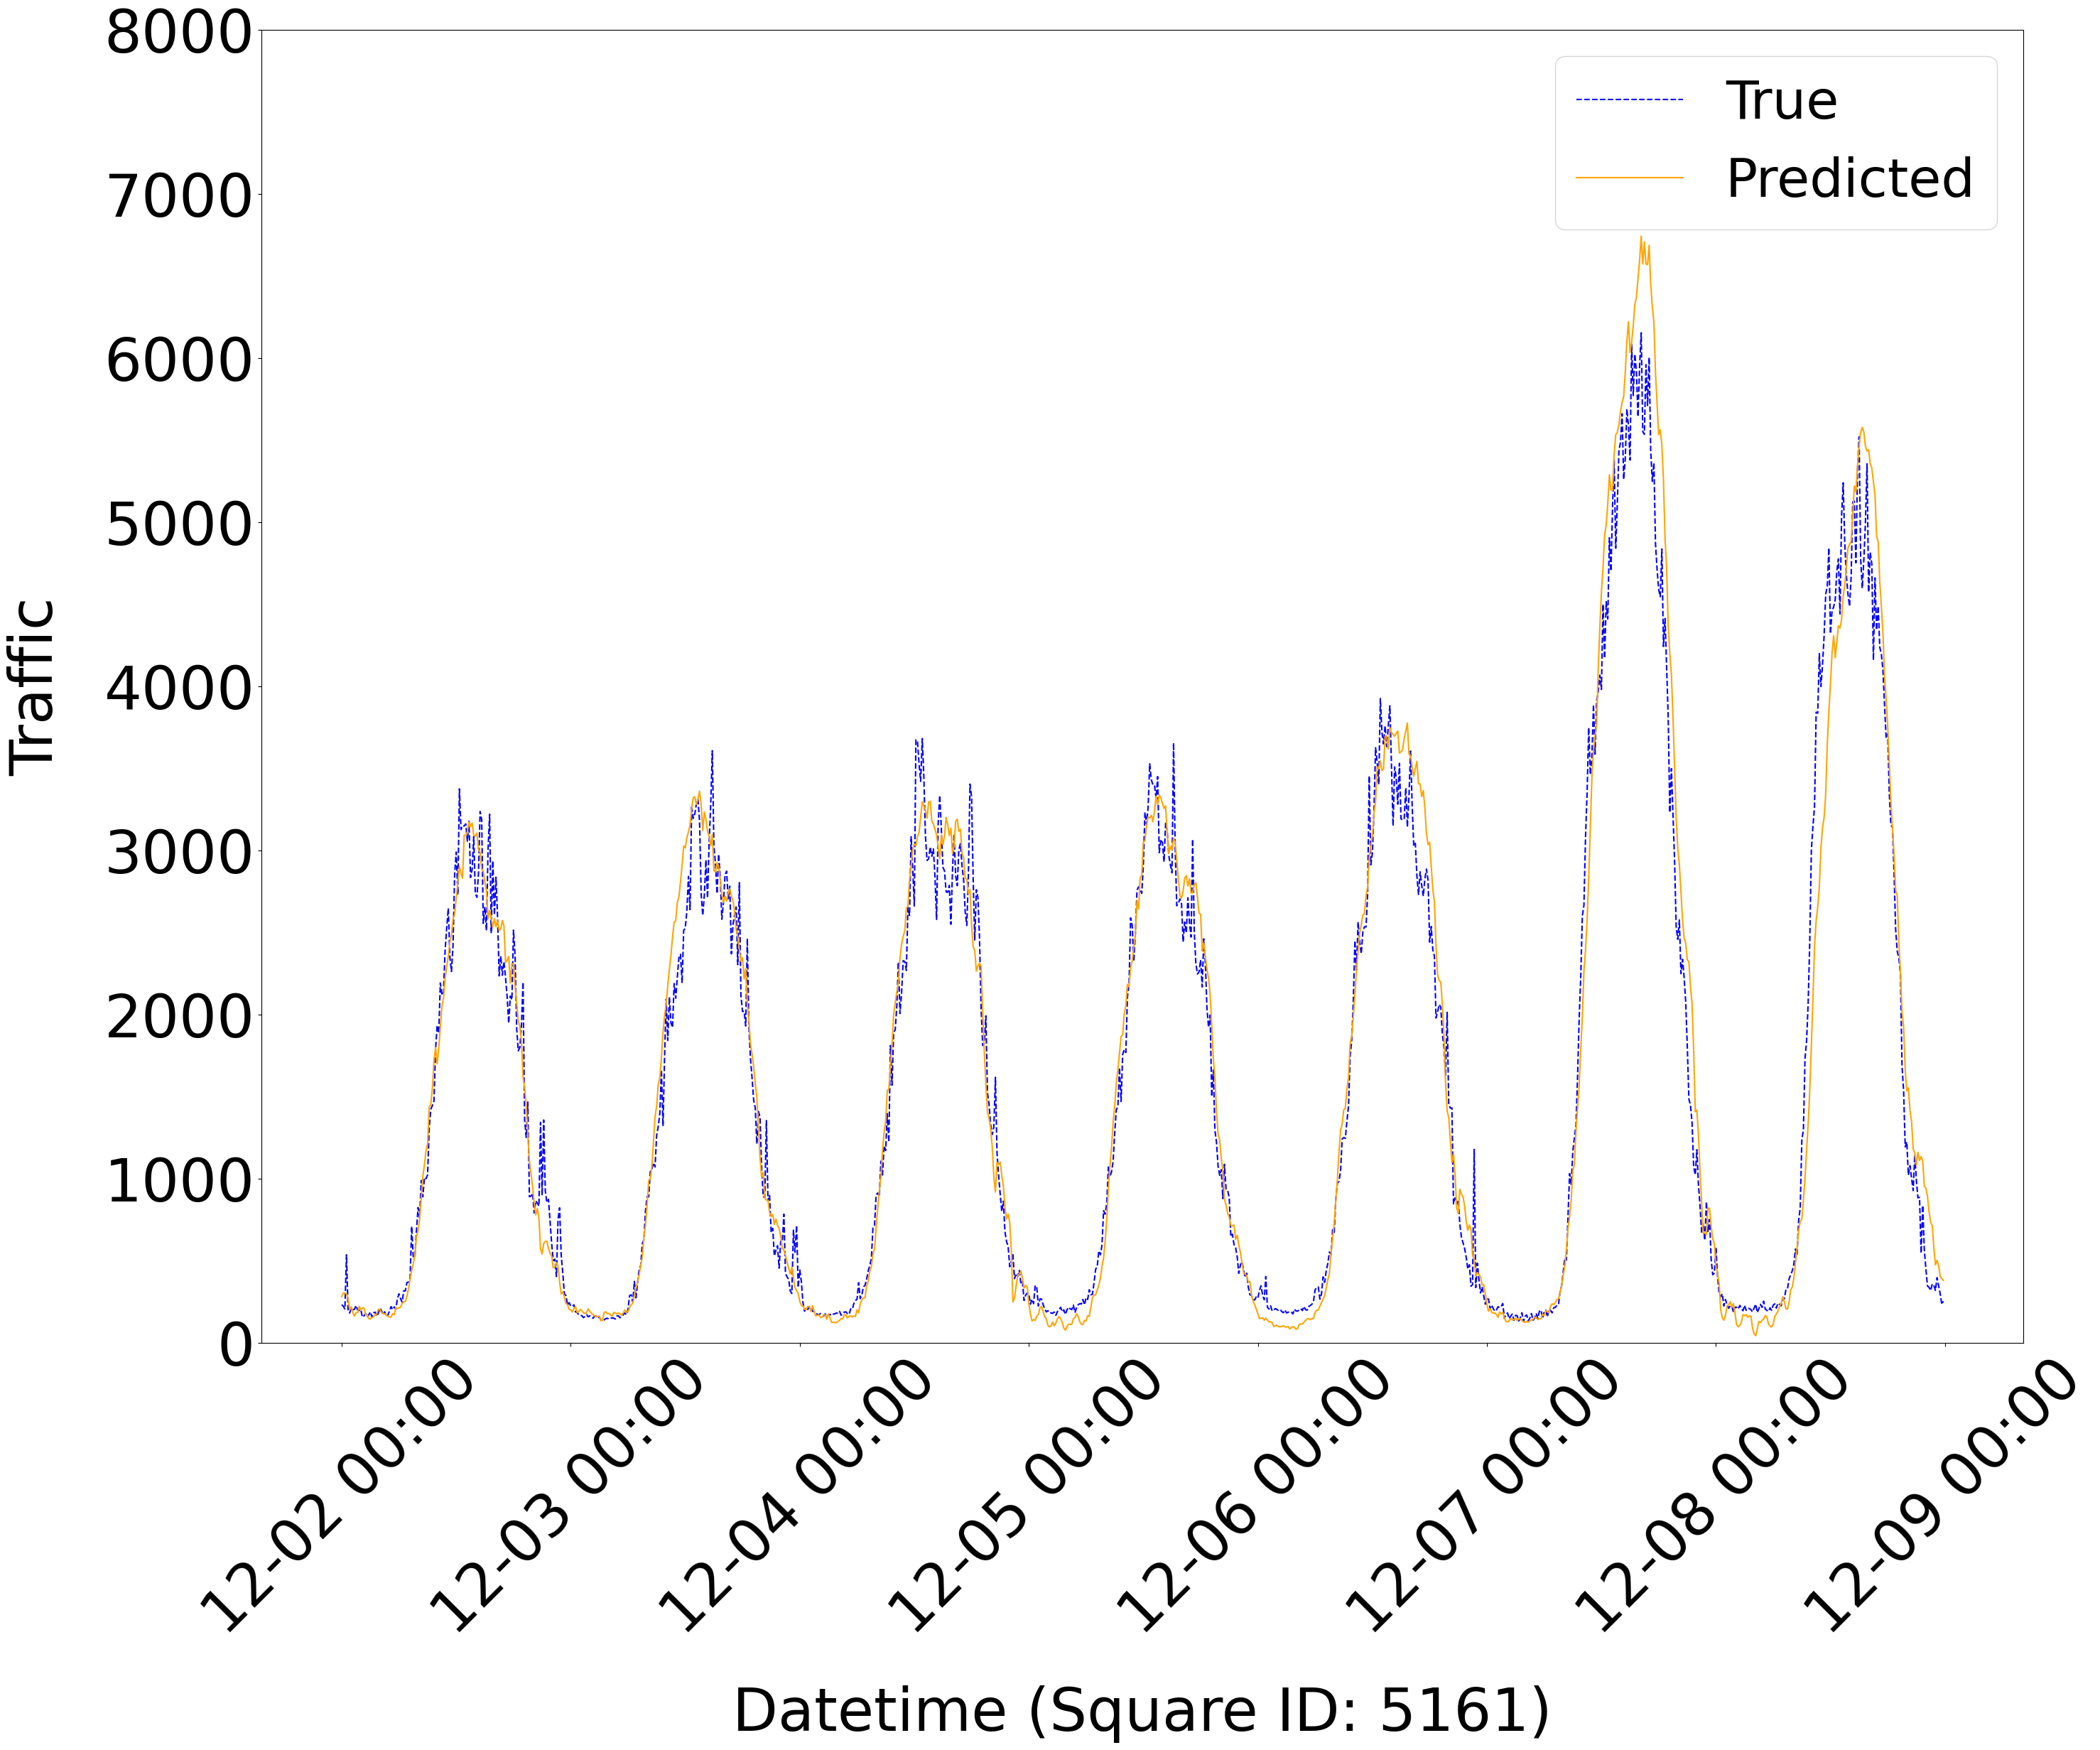

Executing analyze_data_traffic with parameters: timesteps=144, best_model='best_model_id1.h5'
Analyzing data for CellID: 1
32/32 [==============================] - 2s 36ms/step
RMSE: 1.5675727675522948
MAE: 1.2147135850603057
MAPE: 0.11842878486550469
MdAPE: 10.171592844268535
R2: 0.733434004620861
MASE: 0.856420124937982
Plot saved as PDF: C:\Users\goshima\Documents\卒業研究_AI\Python\images\traffic_plot_best_model_id1.pdf


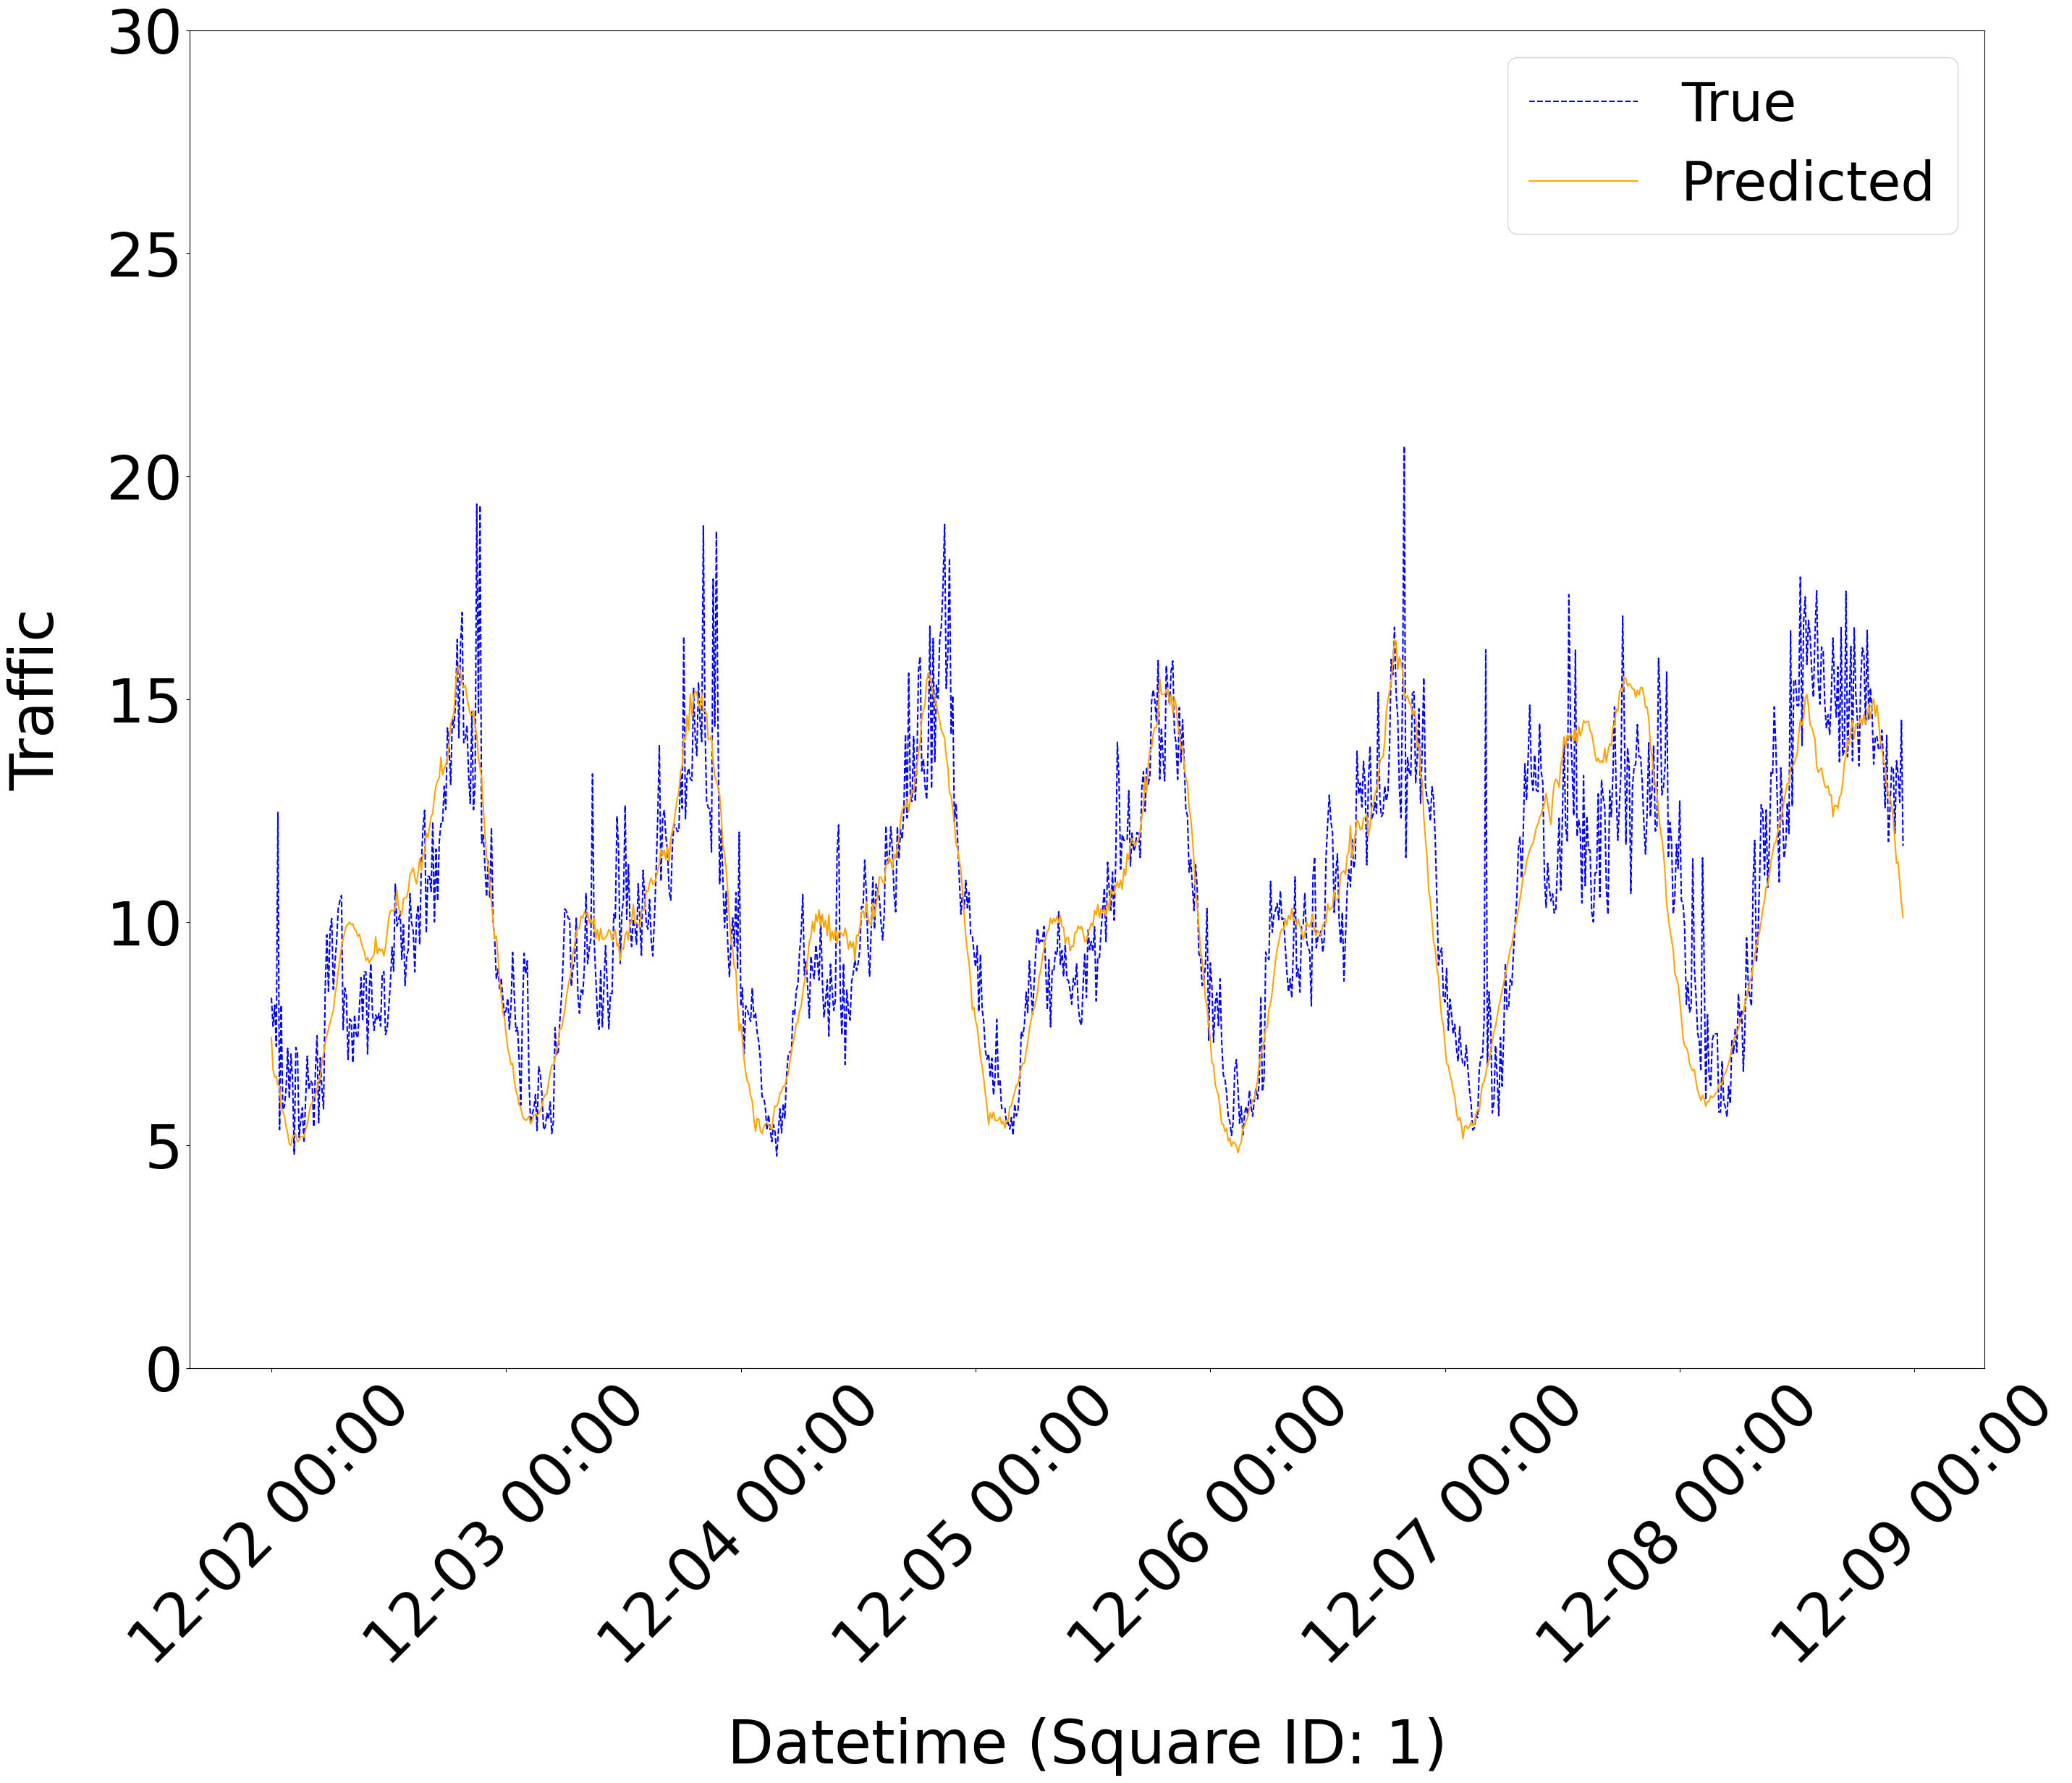

Executing analyze_data_traffic with parameters: timesteps=24, best_model='best_model_hour.h5'
Analyzing data for CellID: 5161
6/6 [==============================] - 1s 21ms/step
RMSE: 3545.9553480989566
MAE: 2169.226182986932
MAPE: 0.45679259429282026
MdAPE: 23.799460089594106
R2: 0.8428925626738444
MASE: 1.1563570297221104
Plot saved as PDF: C:\Users\goshima\Documents\卒業研究_AI\Python\images\traffic_plot_best_model_hour.pdf


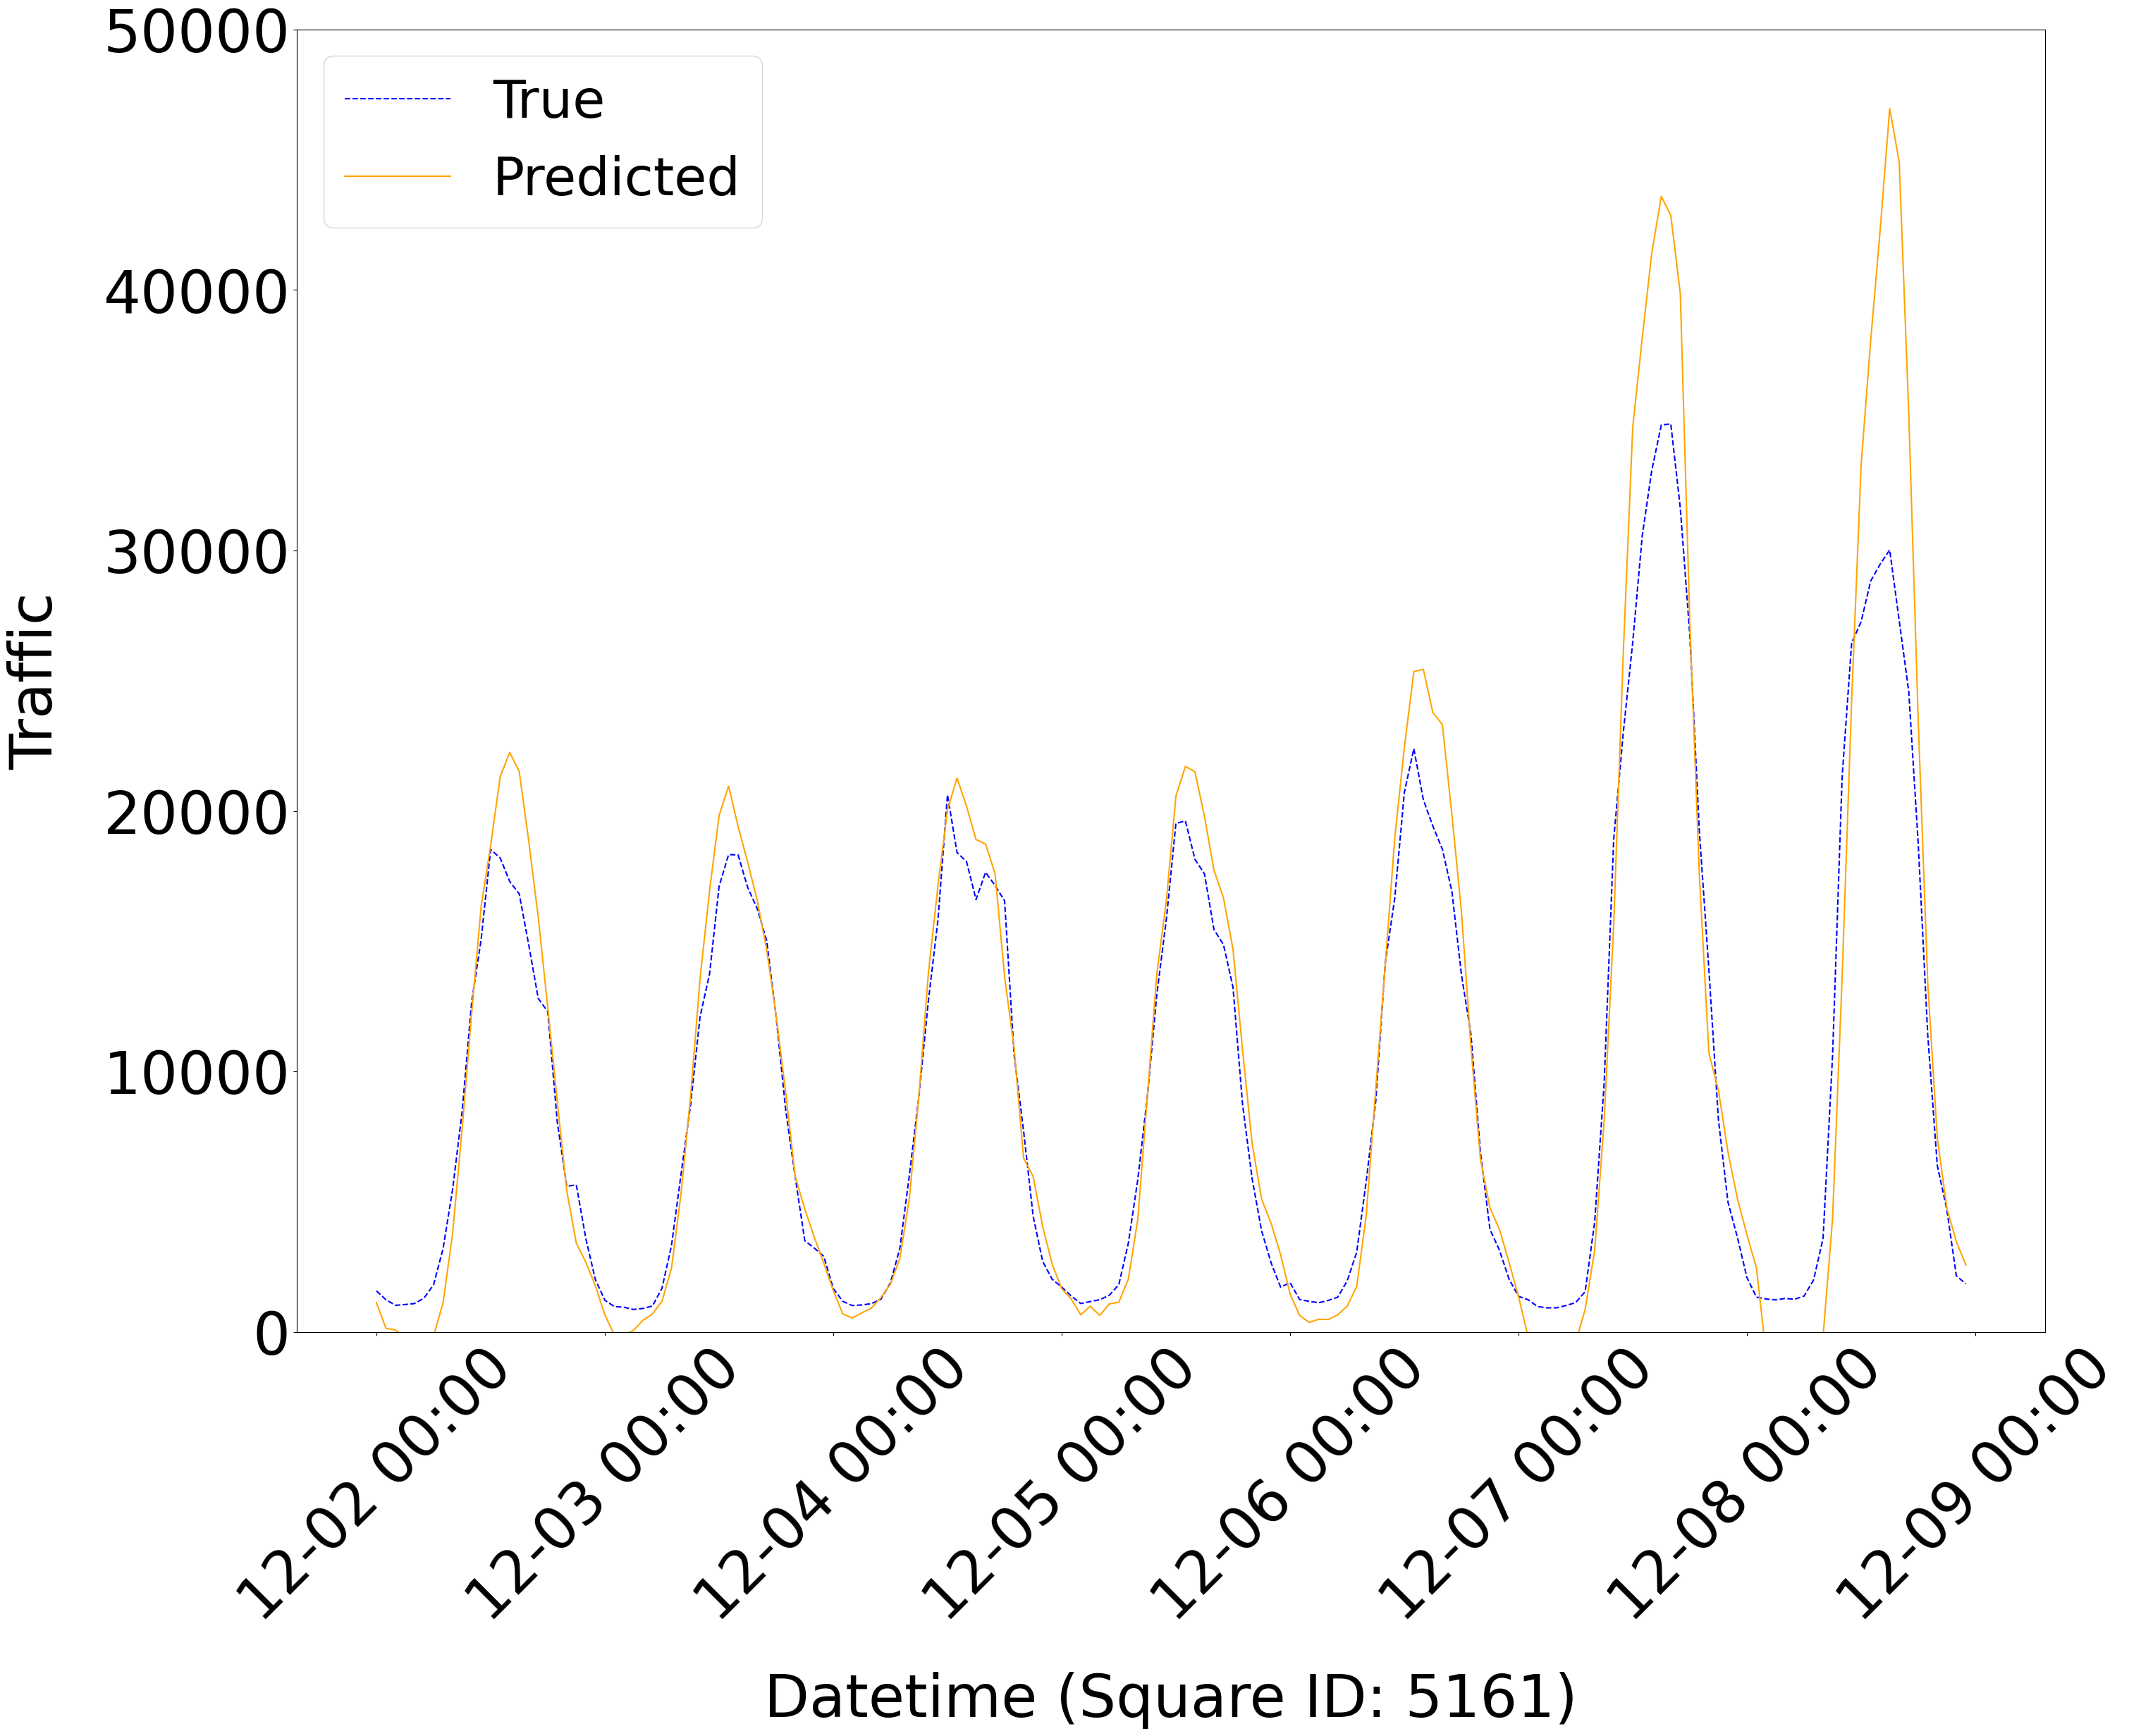

Executing analyze_data_traffic with parameters: timesteps=144, best_model='best_model_unix.h5'
Analyzing data for CellID: 5161
32/32 [==============================] - 2s 37ms/step
RMSE: 612.1382206437986
MAE: 448.110388915123
MAPE: 0.4246012899982786
MdAPE: 36.709016838539625
R2: 0.8341243930723237
MASE: 1.2801917225576376
Plot saved as PDF: C:\Users\goshima\Documents\卒業研究_AI\Python\images\traffic_plot_best_model_unix.pdf


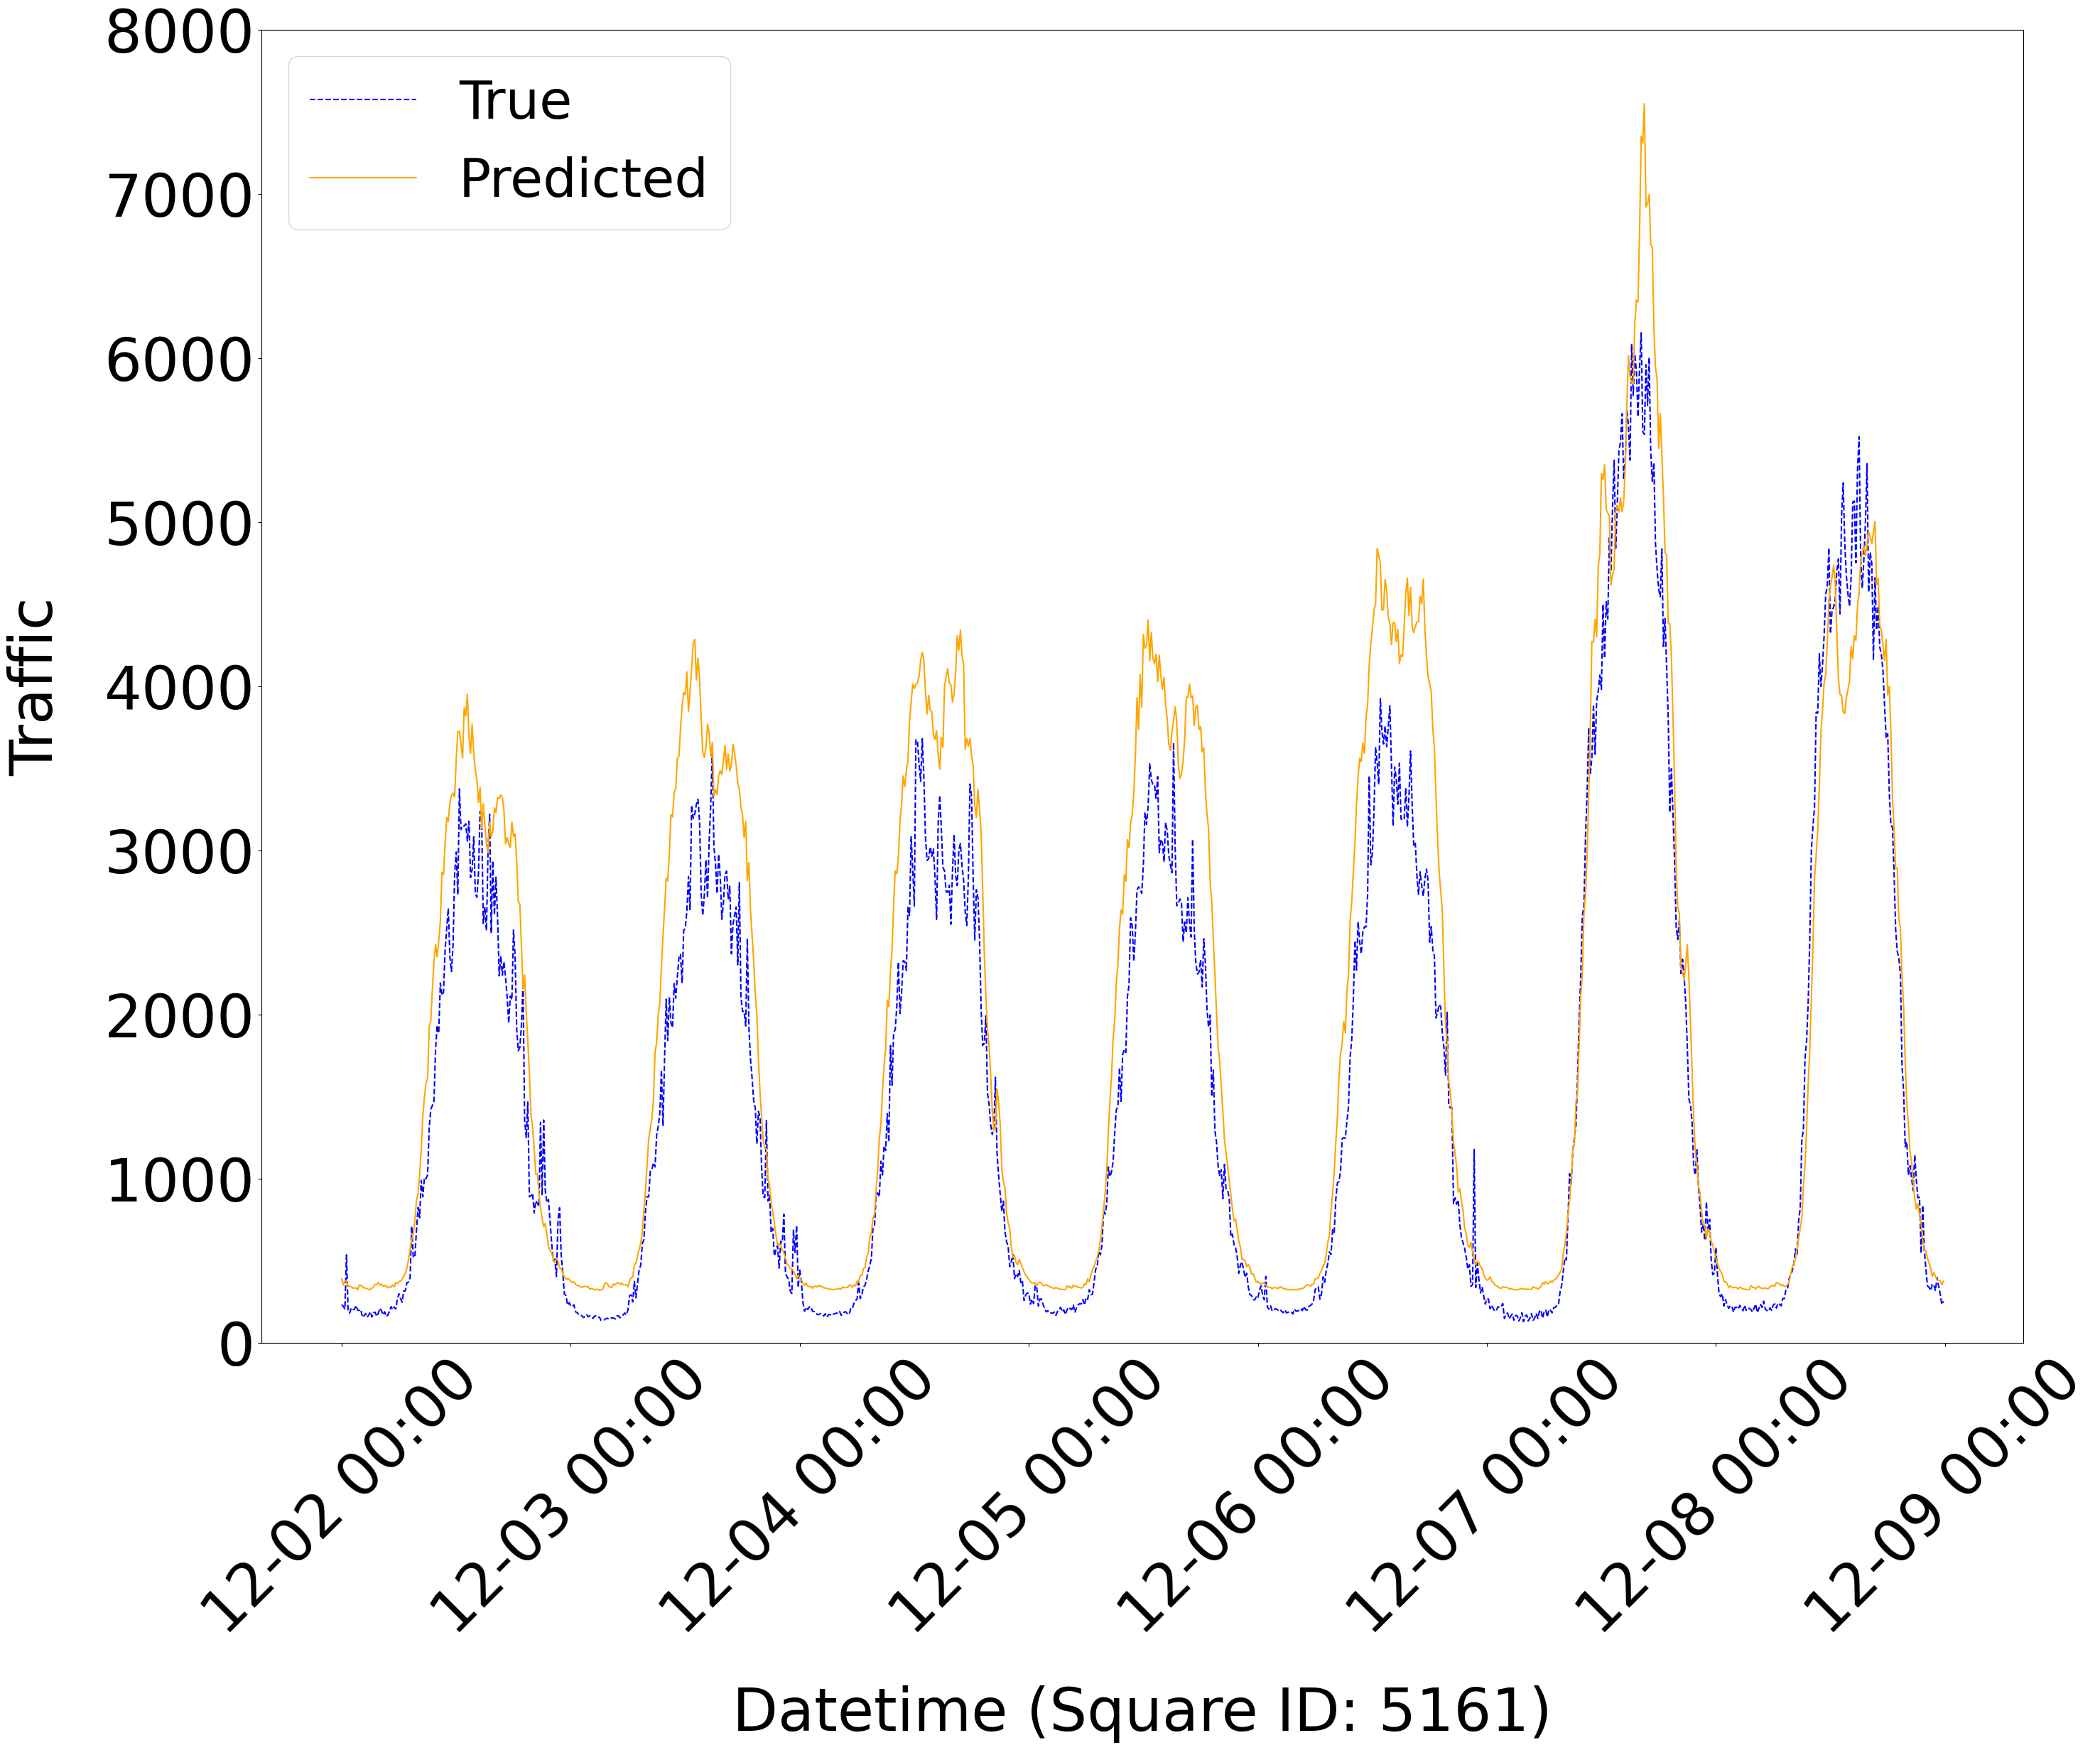

Executing analyze_data_traffic with parameters: timesteps=144, best_model='best_model_no_week.h5'
Analyzing data for CellID: 5161
32/32 [==============================] - 2s 35ms/step
RMSE: 380.05359731115027
MAE: 253.6629734765577
MAPE: 0.3777787905934869
MdAPE: 17.218007083522178
R2: 0.9360599124567364
MASE: 0.7246813441443232
Plot saved as PDF: C:\Users\goshima\Documents\卒業研究_AI\Python\images\traffic_plot_best_model_no_week.pdf


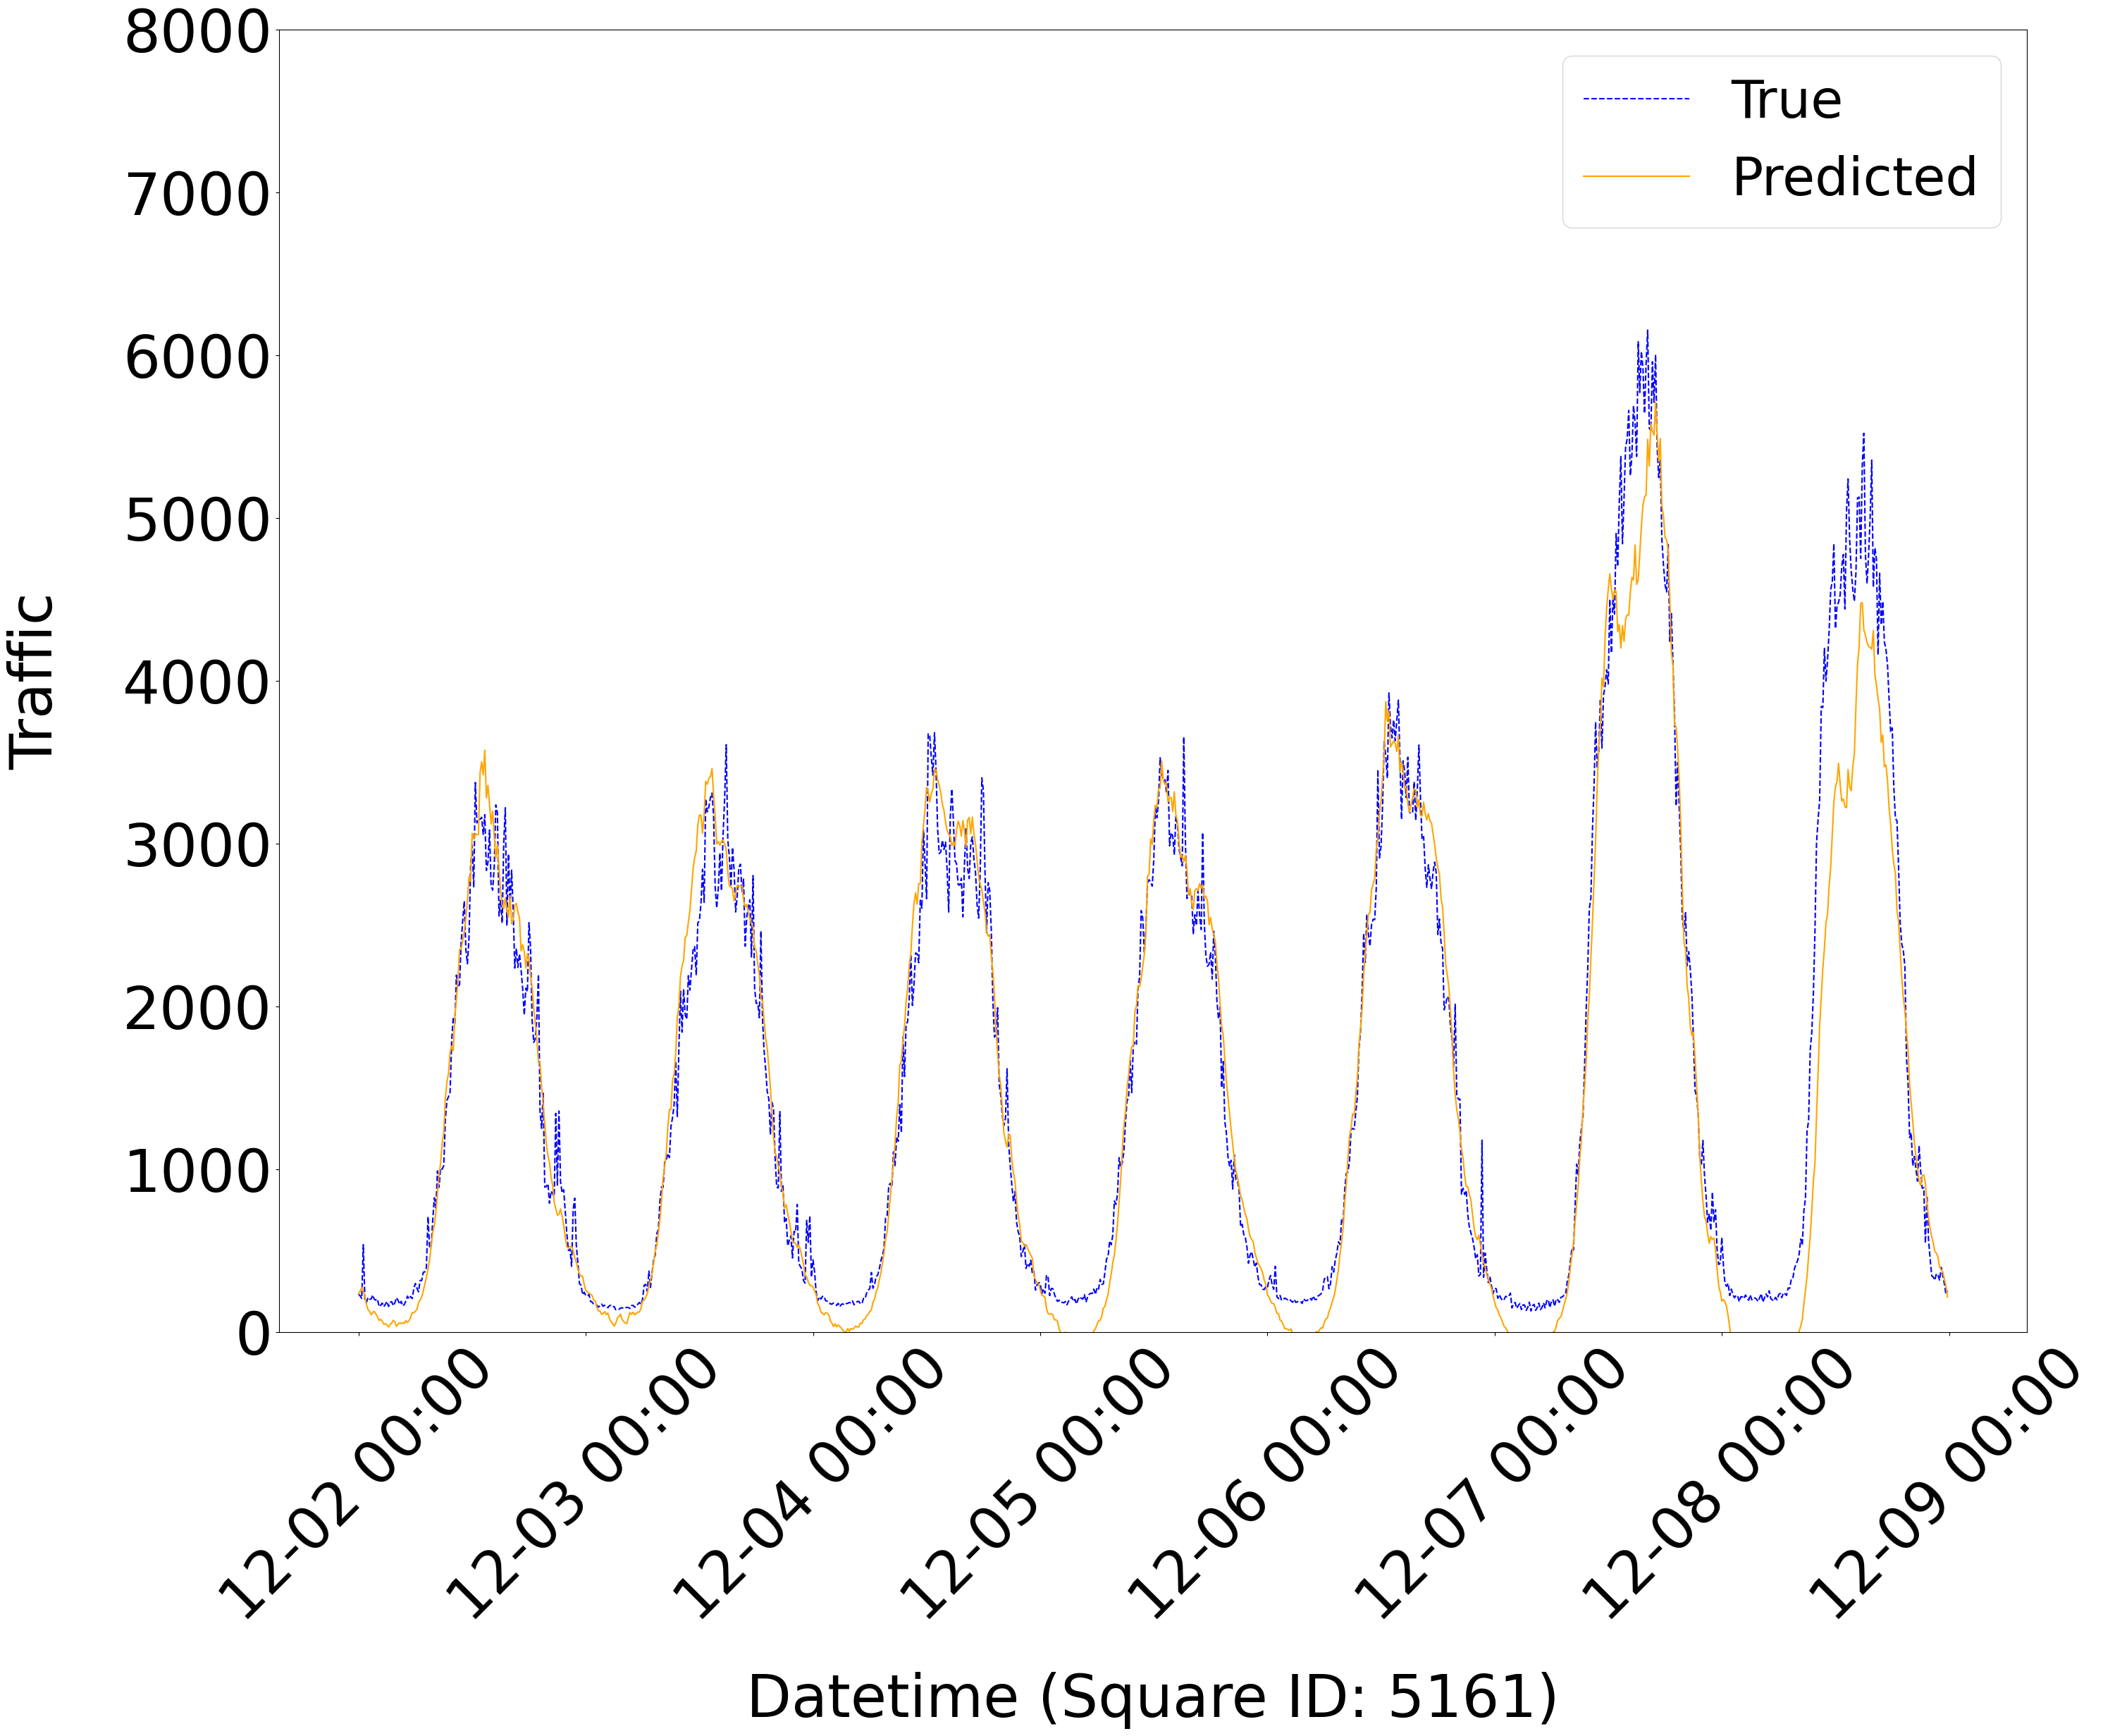

Executing analyze_data_traffic with parameters: timesteps=144, best_model='best_model_no_sms.h5'
Analyzing data for CellID: 5161
Columns 'sms' and 'call' are missing in one or both.
32/32 [==============================] - 2s 40ms/step
RMSE: 481.5031469731308
MAE: 317.8589010895712
MAPE: 0.32801104961799854
MdAPE: 20.411847672296155
R2: 0.8973682365517376
MASE: 0.908080562696374
Plot saved as PDF: C:\Users\goshima\Documents\卒業研究_AI\Python\images\traffic_plot_best_model_no_sms.pdf


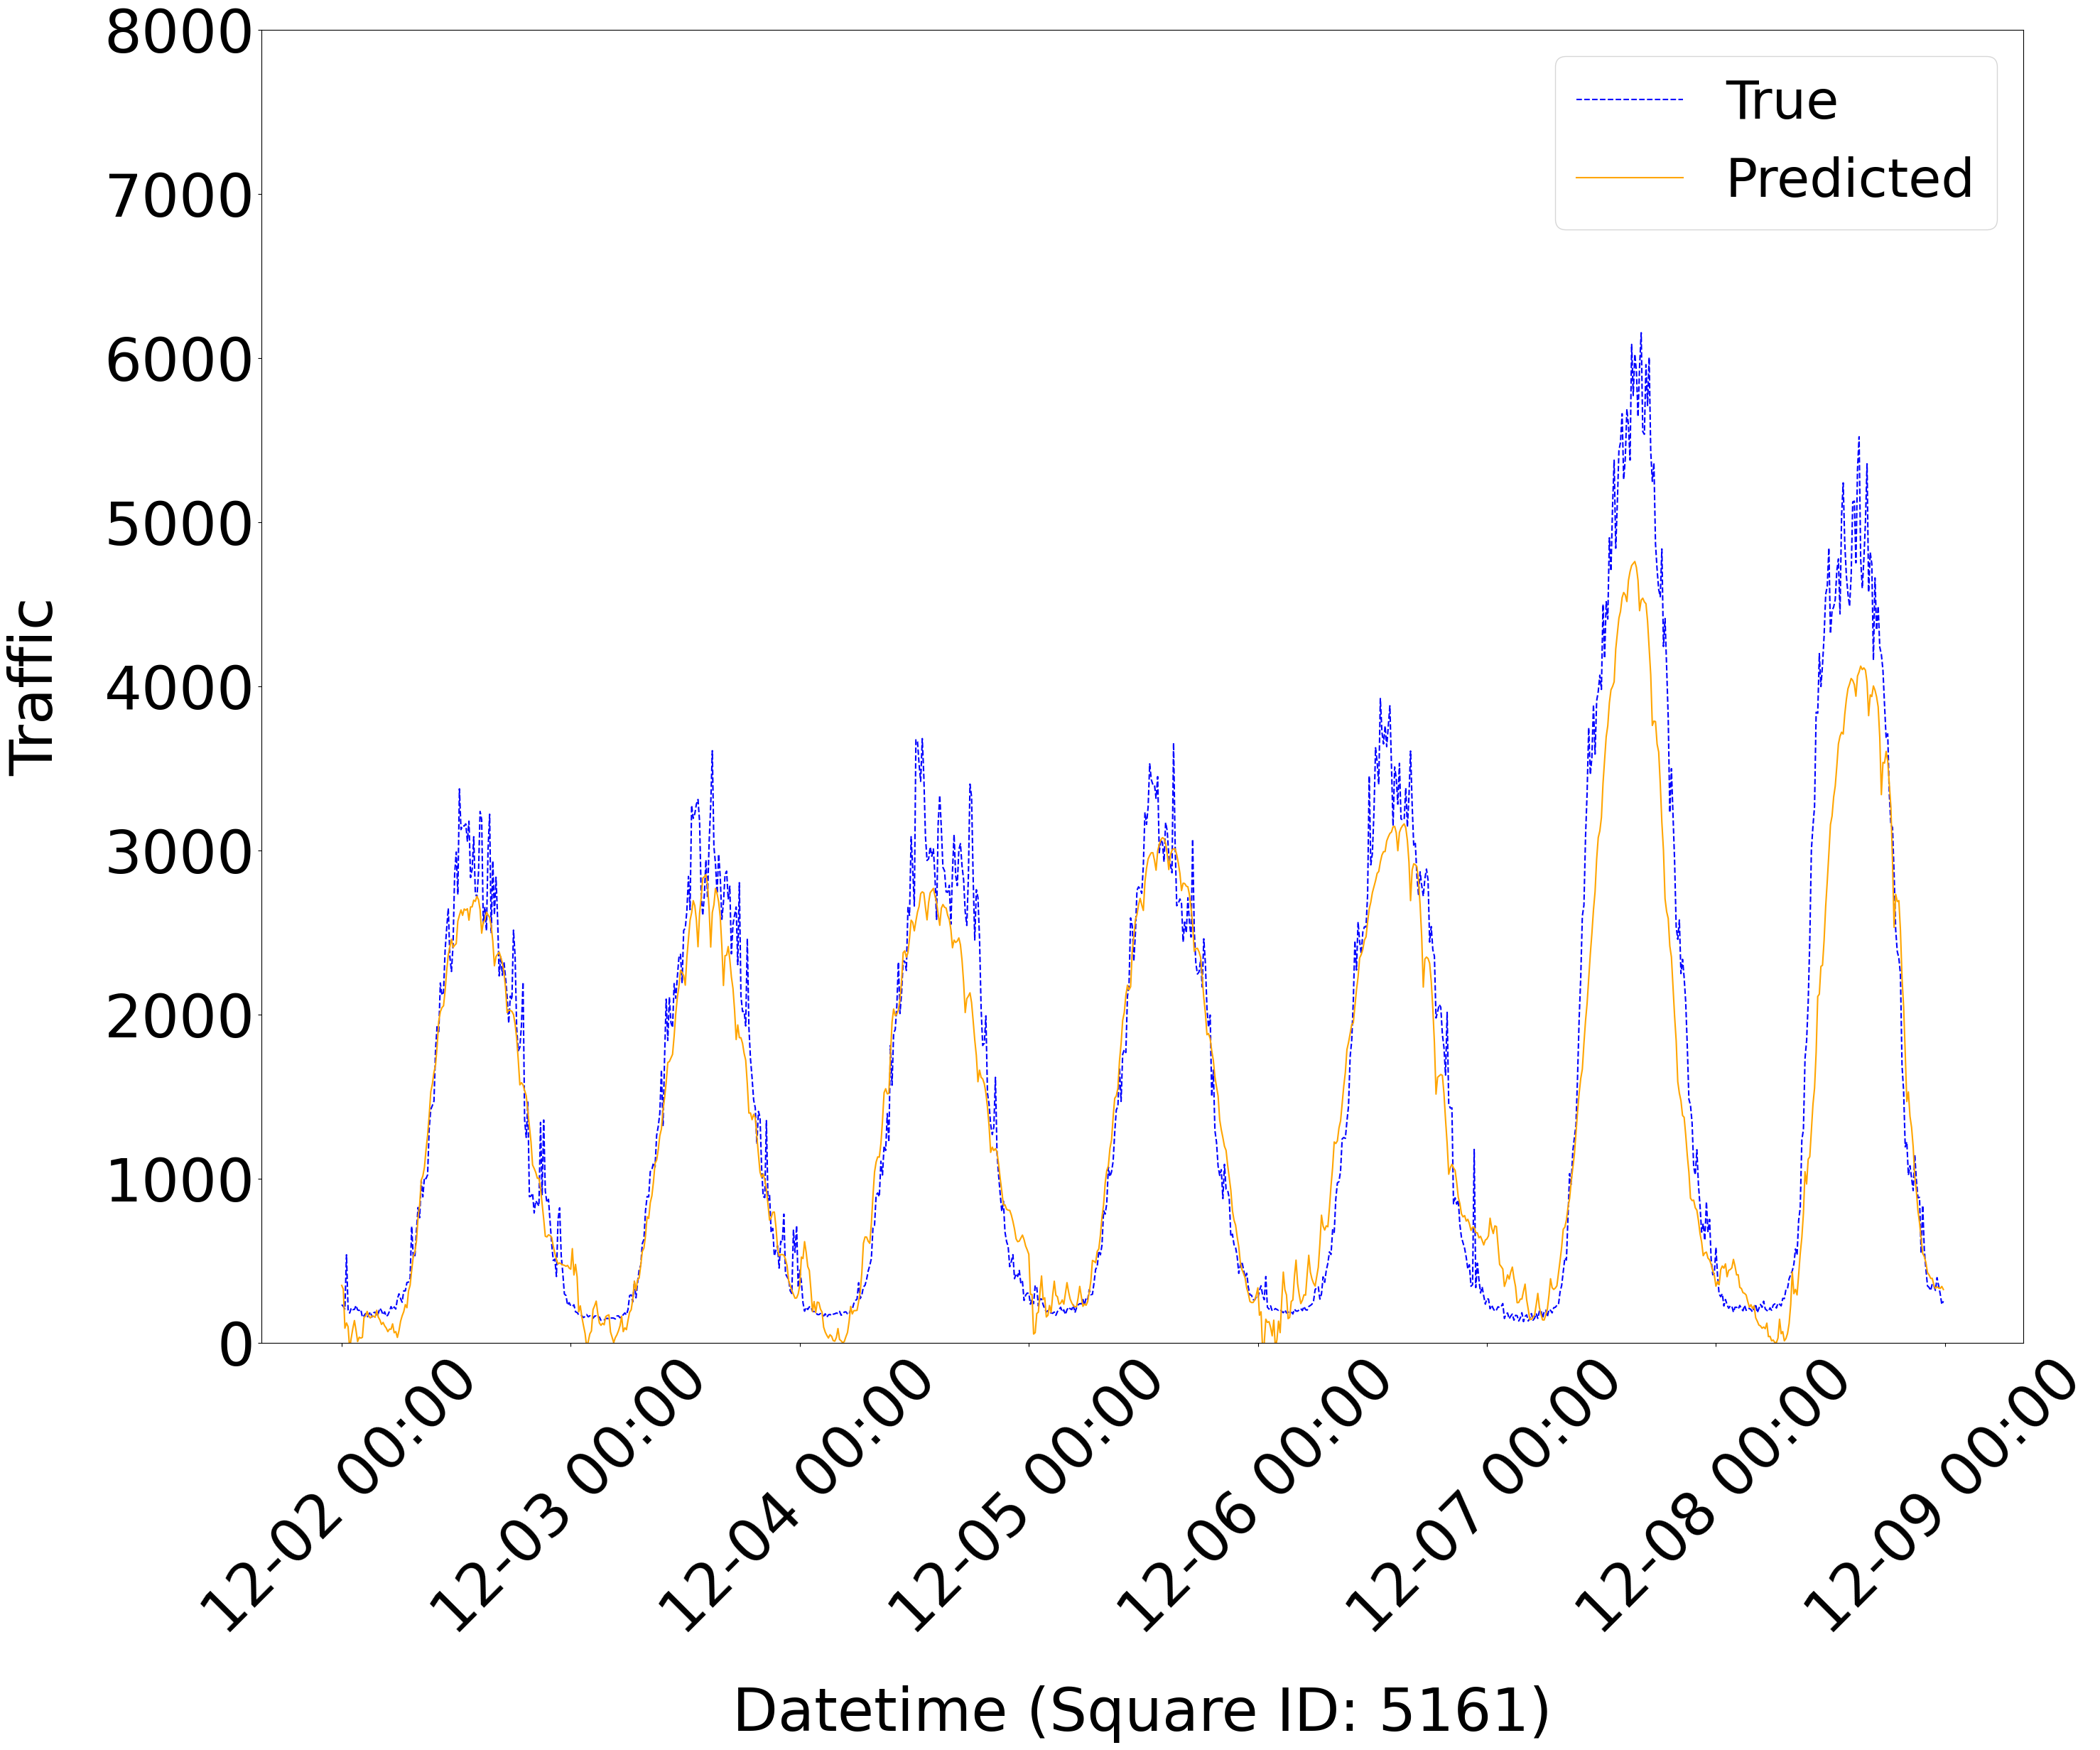

In [11]:
# 基準
cell_id = 5161
time_unit = 'minute'
timesteps = 24*6
seasonal_lag = 24*6
max_value = 8000
loc = 'upper right'
best_model = 'best_model_minute.h5'
print(f"Executing analyze_data_traffic with parameters: timesteps={timesteps}, best_model='{best_model}'")
analyze_data_traffic(cell_id, time_unit, timesteps, best_model, seasonal_lag, max_value, loc)

# 外縁エリア
cell_id = 1
time_unit = 'minute'
timesteps = 24*6
seasonal_lag = 24*6
max_value = 30
loc = 'upper right'
best_model = 'best_model_id1.h5'
print(f"Executing analyze_data_traffic with parameters: timesteps={timesteps}, best_model='{best_model}'")
analyze_data_traffic(cell_id, time_unit, timesteps, best_model, seasonal_lag, max_value, loc)

# hour
cell_id = 5161
time_unit = 'hour'
timesteps = 24
seasonal_lag = 24
max_value = 50000
loc = 'upper left'
best_model = 'best_model_hour.h5'
print(f"Executing analyze_data_traffic with parameters: timesteps={timesteps}, best_model='{best_model}'")
analyze_data_traffic(cell_id, time_unit, timesteps, best_model, seasonal_lag, max_value, loc)

# minute_unix
cell_id = 5161
time_unit = 'minute_unix'
timesteps = 24*6
seasonal_lag = 24*6
max_value = 8000
loc = 'upper left'
best_model = 'best_model_unix.h5'
print(f"Executing analyze_data_traffic with parameters: timesteps={timesteps}, best_model='{best_model}'")
analyze_data_traffic(cell_id, time_unit, timesteps, best_model, seasonal_lag, max_value, loc)

# no_week
cell_id = 5161
time_unit = 'minute'
timesteps = 24*6
seasonal_lag = 24*6
max_value = 8000
loc = 'upper right'
best_model = 'best_model_no_week.h5'
print(f"Executing analyze_data_traffic with parameters: timesteps={timesteps}, best_model='{best_model}'")
analyze_data_traffic_no_week(cell_id, time_unit, timesteps, best_model, seasonal_lag, max_value, loc)

# no_sms_and_call
cell_id = 5161
time_unit = 'minute'
timesteps = 24*6
seasonal_lag = 24*6
max_value = 8000
loc = 'upper right'
best_model = 'best_model_no_sms.h5'
print(f"Executing analyze_data_traffic with parameters: timesteps={timesteps}, best_model='{best_model}'")
analyze_data_traffic_no_sms_and_call(cell_id, time_unit, timesteps, best_model, seasonal_lag, max_value, loc)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
from tensorflow.keras.models import load_model

from load_sms_call_internet_mi import load_dataset_ID
from normalize_train_test import apply_MMS
from set_timesteps import create_timeseries_data
from evaluate_model_performance import evaluate_model

import load_dataset_1week
import split_data

In [ ]:
def analyze_data_traffic_1week(CellID, time_unit, timesteps, best_model, seasonal_lag, max_value):
    # 不正な空白が含まれている可能性に備えてtime_unitを整形
    time_unit = time_unit.strip() 

    # CellIDを表示
    print(f"Analyzing data for CellID: {CellID}")

    dataset = load_dataset_1week.load_dataset_minute(5161)

    feature = dataset.drop(columns=['datetime', 'internet'])
    target = dataset[['datetime', 'internet']]

    train_x, test_x, train_y, test_y, y_datetime = split_data.split_data_8_2(feature, target)

    # 値を0～1の範囲に正規化し、pandas DataframeからNumPy配列に変更（mms_yは評価指標に使用）
    train_x, test_x, train_y, test_y, mms_y = apply_MMS(train_x, test_x, train_y, test_y)
    
    # ["データ数", "timesteps", "特徴量数"]の三次元構造に変換（x_train, x_testに名称変更）
    # timesteps時間以降のデータを目的変数に設定（y_train, y_testに名称変更）
    x_train, x_test, y_train, y_test = create_timeseries_data(train_x, test_x, train_y, test_y, timesteps)

    # 最良モデルのロード
    model_path = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\Datasets\best_model", time_unit, best_model)
    model = load_model(model_path)

    # テストデータの予測
    y_test_pred, y_test_true = evaluate_model(x_test, y_test, mms_y, model, seasonal_lag)

    # 時系列データに合わせてプロット
    datetime = y_datetime[timesteps:]
    plt.rcParams.update({'font.size': 60})
    plt.figure(figsize=(32, 24))
    plt.plot(datetime, y_test_true, linestyle='--', color='blue', label='True')
    plt.plot(datetime, y_test_pred, color='orange', label='Predicted')
    plt.gca().xaxis.set_major_locator(AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d %H:%M"))
    plt.xticks(rotation=45)
    plt.ylabel('Traffic', labelpad=40)
    plt.xlabel(f'Datetime (Square ID: {CellID})', labelpad=40) 
    plt.legend(loc='upper right', fontsize=54)
    plt.ylim(0, max_value)

    # グラフをPDF形式で保存
    best_model = best_model[:-3]
    output_dir = os.path.join(r"C:\Users\goshima\Documents\卒業研究_AI\Python\images")
    os.makedirs(output_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成
    output_path = os.path.join(output_dir, f"traffic_plot_{best_model}.pdf")
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    print(f"Plot saved as PDF: {output_path}")

    # グラフを表示
    plt.show()

    # リソース解放
    plt.close()

In [ ]:
# 1week
cell_id = 5161
time_unit = 'minute'
timesteps = 36
seasonal_lag = 24*6
max_value = 8000
best_model = 'best_model_1week.h5'
print(f"Executing analyze_data_traffic with parameters: timesteps={timesteps}, best_model='{best_model}'")
analyze_data_traffic_1week(cell_id, time_unit, timesteps, best_model, seasonal_lag, max_value)